-----------------------
# <center>TP n°1 : Perceptron de F. Rosenblatt<center>
------------------------

# *Introduction*
## Génération artificelle de données
Dans un but d’expérimentation et de visualisation, il est plus aisé de travailler sur des données générées artificiellement. Ainsi on considère ici des variables explicatives (features en anglais) de dimension deux.              
Cela consiste à prendre $p = 2$ dans le formalisme de l'énoncé du TP.

In [31]:
"""Created on Mon Sep 23 17:50:04 2013.
Modified on Mon Nov 4 21:09:38 2019 by mozharovskyi.

@author: baskiotis, salmon, gramfort
"""

###############################################################################
#               Impoort part
###############################################################################
#%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from matplotlib import rc

###############################################################################
# Displaying labeled data
###############################################################################

#symlist = ['o', 'p', '*', 's', '+', 'x', 'D', 'v', '-', '^']

#rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {#'axes.labelsize': 6,
          #'font.size': 8,
          #'legend.fontsize': 8,
          #'text.usetex': False,
          'figure.figsize': (15, 10)}
plt.rcParams.update(params)
sns.set
#sns.set_context("poster")
#sns.set_palette("colorblind")
#sns.set_style("white")
#sns.axes_style()


<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

*1) Étudiez la fonction `rand_gauss(n, mu, sigmas)` qui engendre $n$ observations selon la loi normale multi-dimensionnelle de moyenne le vecteur mu et de matrice de covariance la matrice diagonale de diagonale `sigmas = [σ1, σ2]`, i.e., la matrice de variance covariance est : 
σ1 0
0 σ2*

In [32]:
###############################################################################
#    Data Generation    (you can skip the understanding)
###############################################################################


def rand_gauss(n=100, mu=[1, 1], sigmas=[0.1, 0.1]):
    """Sample  points from a Gaussian variable.

    Parameters
    ----------
    n : number of samples

    mu : centered

    sigma : standard deviation
    """
    d = len(mu)
    res = np.random.randn(n, d)
    return np.array(mu + res * sigmas)



In [33]:
rand_gauss()

array([[0.99196253, 1.21901839],
       [0.93679447, 1.01079119],
       [1.03200227, 1.06511228],
       [0.93440436, 0.89796785],
       [1.01308053, 1.01734077],
       [0.94743939, 0.98140005],
       [0.81825272, 0.76315738],
       [0.88240985, 1.0763859 ],
       [0.94836201, 1.06185535],
       [0.97936988, 1.05413002],
       [0.84338089, 0.99138036],
       [1.19766265, 1.15019863],
       [0.90354513, 0.99872082],
       [0.84825212, 1.11702664],
       [1.01206732, 0.99676446],
       [0.85355276, 0.82675399],
       [1.13104566, 0.99066332],
       [0.87484648, 1.07273265],
       [1.04222487, 0.95723547],
       [1.05044687, 0.9558933 ],
       [1.10216822, 0.91355091],
       [1.04475007, 1.00893847],
       [1.10172437, 1.10573825],
       [0.93090972, 1.01987385],
       [0.93924734, 1.18924497],
       [0.96401374, 0.80385626],
       [0.82618539, 0.94855146],
       [1.04386797, 0.95731659],
       [0.98612389, 1.03750011],
       [0.88417662, 1.09906635],
       [1.

In [34]:
rand_gauss()[:,0]

array([0.96153382, 1.27320631, 0.9111156 , 0.9785181 , 1.07170733,
       1.01915558, 1.01395216, 0.9808279 , 0.93947496, 0.90090201,
       0.98267708, 1.04764502, 0.96216688, 0.92554343, 1.09195889,
       0.84792116, 1.18097184, 0.85467753, 1.11783092, 0.99777616,
       0.88500763, 0.88461836, 0.84843041, 1.05825995, 1.12655961,
       0.90345646, 0.89305748, 1.1313261 , 0.97292023, 1.06800254,
       0.81001031, 1.26523082, 0.93250485, 0.89057761, 1.08750688,
       0.99118009, 1.03543924, 0.85339223, 1.01861467, 0.88044467,
       0.97376473, 1.05524808, 0.98289868, 1.08070044, 0.86632544,
       1.04619093, 1.02874084, 1.09851508, 0.8765906 , 0.92047426,
       1.04993022, 1.08209531, 1.03300684, 0.77721452, 0.99811777,
       0.97695739, 1.06665983, 1.00255519, 1.04008499, 1.01608652,
       1.14943538, 1.15454235, 0.91234001, 1.10540926, 0.98213443,
       1.13002124, 1.048445  , 0.9775641 , 0.81071554, 1.17897976,
       1.20381368, 0.93006213, 1.10654668, 1.1922526 , 1.01033

In [35]:
rand_gauss()[:,1]

array([0.8514845 , 1.05578545, 1.07502248, 0.98701605, 1.01815041,
       1.00220452, 0.9878728 , 1.04592014, 0.87064836, 1.05402491,
       1.1214932 , 0.9837542 , 1.06299131, 0.96205125, 0.84695315,
       0.95470892, 1.01691181, 1.06629423, 1.06905103, 0.96599567,
       0.94961366, 1.0136476 , 1.16351265, 1.13787617, 1.08357596,
       1.12944627, 0.88375735, 1.03892464, 0.9396311 , 1.04152304,
       1.05876007, 1.07225975, 0.8748603 , 1.01977076, 0.74144725,
       0.97845882, 1.14985956, 1.00170967, 0.97597814, 0.97013453,
       0.99071024, 1.00211498, 0.86781306, 0.9417499 , 0.92424988,
       1.16568128, 1.04740486, 0.96931556, 0.85177049, 1.07842953,
       1.0054372 , 0.92950283, 0.92493434, 1.24298469, 1.06057982,
       1.21159526, 1.07965345, 1.11973549, 0.88457046, 1.1470746 ,
       1.07404653, 1.048343  , 1.08256955, 0.99570854, 1.1114704 ,
       0.94655843, 1.06949246, 1.06792287, 1.02595109, 1.20121633,
       1.02598648, 1.03927065, 0.95279183, 1.17974135, 1.11082

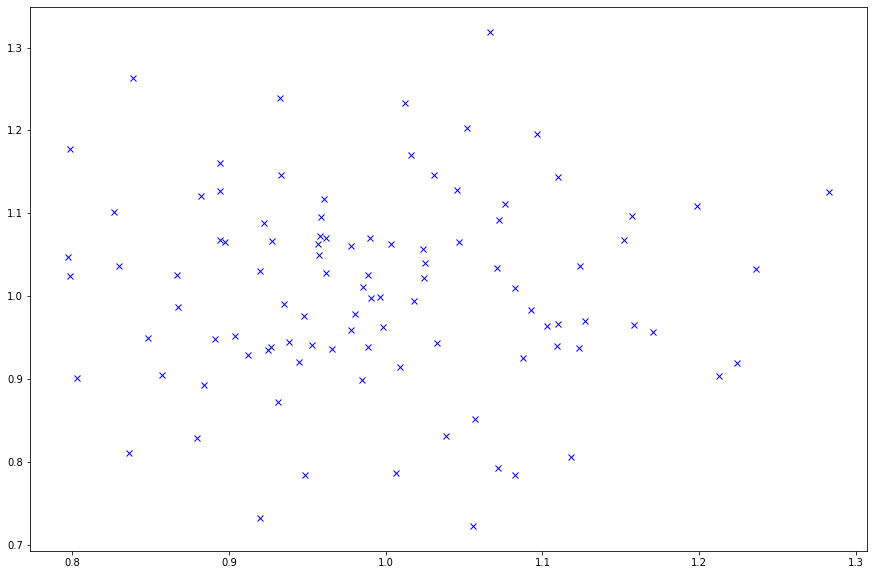

In [36]:
#%matplotlib widget 
#or ipympl

col1 = rand_gauss()[:,0]
col2 = rand_gauss()[:,1]

plt.figure()
plt.plot(col1, col2, 'x',label="")
plt.show()

*Générer ensuite plusieurs jeux de données à l’aide des fonctions `rand_bi_gauss`, `rand_clown` et `rand_checkers` pour différents paramètres d’entrée `n,mu,sigma`. Que renvoient ces fonctions ? À quoi correspond la seconde variable de sortie ?*

In [37]:
def rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],
                  sigmas2=[0.1, 0.1]):
    """Sample points from two Gaussian distributions.

    Parameters
    ----------
    n1 : number of sample from first distribution

    n2 : number of sample from second distribution

    mu1 : center for first distribution

    mu2 : center for second distribution

    sigma1: std deviation for first distribution

    sigma2: std deviation for second distribution
    """
    ex1 = rand_gauss(n1, mu1, sigmas1)
    ex2 = rand_gauss(n2, mu2, sigmas2)
    y = np.hstack([np.ones(n1), -1 * np.ones(n2)])
    X = np.vstack([ex1, ex2])
    ind = np.random.permutation(n1 + n2)
    return X[ind, :], y[ind]


def rand_clown(n1=100, n2=100, sigma1=1, sigma2=2):
    """Create samples and labels form a **clown** dataset.

    Parameters
    ----------
    n1 : number of sample from first blob

    n2 : number of sample from second blob

    sigma1 :  noise std deviation for the first blob

    sigma2 :  noise std deviation for the second blob
    """
    x0 = np.random.randn(n1, 1)
    x1 = x0 * x0 + sigma1 * np.random.randn(n1, 1)
    x2 = np.hstack([sigma2 * np.random.randn(n2, 1),
                    sigma2 * np.random.randn(n2, 1) + 2.])
    X = np.vstack([np.hstack([x0, x1]), x2])
    y = np.hstack([np.ones(n1), -1 * np.ones(n2)])
    ind = np.random.permutation(n1 + n2)
    return X[ind, :], y[ind]


def rand_checkers(n1=100, n2=100, sigma=0.1):
    """Create samples and labels from a noisy checker.

    Parameters
    ----------
    n1 : number of samples for the first class

    n2 : number of samples for the second class
    """
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [-1] * nb

            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb

    ind = np.random.permutation((nbp + nbn) * 8)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])


In [38]:
rand_bi_gauss()

(array([[-1.00451935, -0.85757199],
        [ 0.87742719,  0.90404786],
        [-1.03941282, -1.02651522],
        [ 0.95072372,  0.93938283],
        [-1.13996845, -0.96182377],
        [ 1.07915045,  1.07374364],
        [-1.09759513, -1.08466812],
        [ 1.05463374,  1.05808323],
        [ 0.87365244,  0.94475655],
        [-0.84154558, -0.89098969],
        [ 0.92999229,  1.09518819],
        [-0.86249647, -1.06863676],
        [ 0.90312415,  0.90810559],
        [ 1.12266305,  0.89328582],
        [ 1.12023676,  1.12398911],
        [ 0.74519009,  1.10328618],
        [-0.94569865, -0.96608823],
        [ 0.84632652,  0.93959965],
        [ 1.08188874,  0.88252043],
        [ 0.94273076,  1.140905  ],
        [-1.09072345, -1.05412776],
        [ 1.00523231,  0.91458568],
        [-1.1153677 , -1.05477465],
        [-1.04553576, -0.96308431],
        [-1.04528829, -1.05706553],
        [-0.98552154, -1.0297939 ],
        [-0.96047626, -1.06182658],
        [ 1.1864548 ,  0.916

*2) Conservez quelques jeux de données afin de les utiliser dans la suite : pour chacun, il faudra sauver sous forme d’un tableau `numpy` à deux colonnes $X$ les données, et dans un vecteur $Y$ les labels correspondants à chaque exemple.*

In [39]:
###############################################################################
#            Displaying labeled data
###############################################################################
symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
           'fuchsia']


def plot_2d(X, y, w=None, step=50, alpha_choice=1):
    """2D dataset data ploting according to labels.

    Parameters
    ----------

    X : data features

    y : label vector

    w :(optional) the separating hyperplan w

    alpha_choice : control alpha display parameter
    """
    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    labels = np.unique(y)
    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette(collist)              # ("pastel", k)
    sns.set_palette(color_blind_list)
    for i, label in enumerate(y):
        label_num = np.where(labels == label)[0][0]
        plt.scatter(X[i, 0], X[i, 1],
                    c=np.reshape(color_blind_list[label_num], (1, -1)),
                    s=80, marker=symlist[label_num])
    plt.xlim([min_tot0 - delta0 / 10., max_tot0 + delta0 / 10.])
    plt.ylim([min_tot1 - delta1 / 10., max_tot1 + delta1 / 10.])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)



In [40]:
Xb1,Yb1 = rand_bi_gauss()
Xb2,Yb2 = rand_bi_gauss()
Xb3,Yb3 = rand_bi_gauss()

Xc1,Yc1 = rand_clown(n1=100, n2=100, sigma1=0.1, sigma2=0.2) # pour affiner la courbe et mieux séparer les points (voir plus bas)
Xc2,Yc2 = rand_clown()
Xc3,Yc3 = rand_clown()

Xk1,Yk1 = rand_checkers()
Xk2,Yk2 = rand_checkers()
Xk3,Yk3 = rand_checkers()

*3) Utilisez la fonction `plot_2d` disponible dans `tp_perceptron_source.py` et qui permet de visualiser quelques jeux de données en fonction des étiquettes associées. Changer la couleur de la classe des −1.*

**Réponse :** dans la fonction `plot_2d`, on remplace
```python
color_blind_list = sns.color_palette("pastel", k) 
```
par
```python
color_blind_list = sns.color_palette(collist) 
```
en sachant que `collist` est défini comme suit :
```python
collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
           'fuchsia']
```
c'est à dire que le premier label sera en **'blue'** et le deuxième en **'red'**.

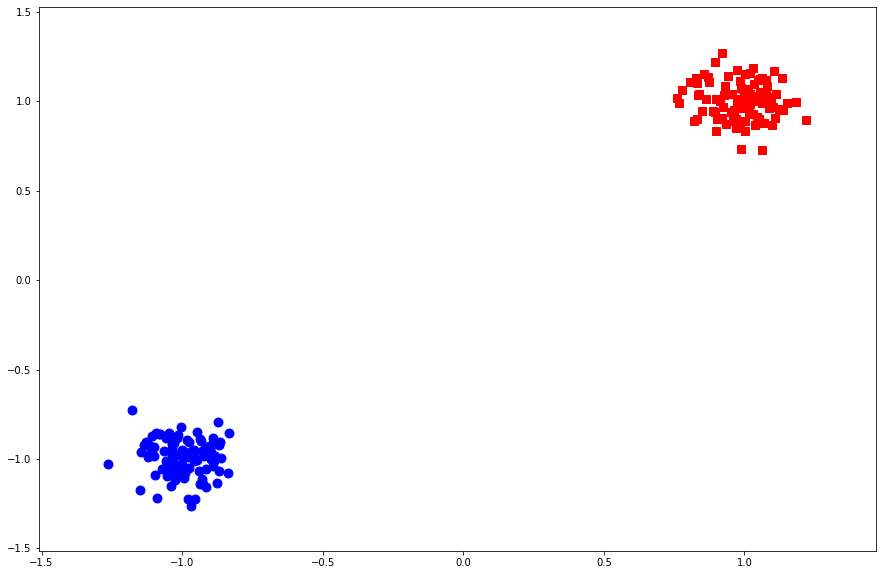

In [41]:
plot_2d(Xb1,Yb1)

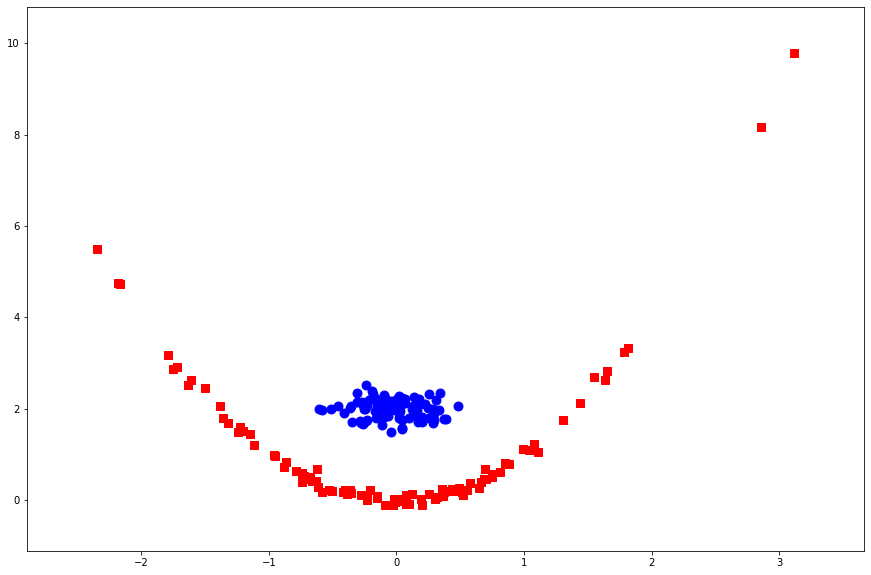

In [42]:
plot_2d(Xc1,Yc1)

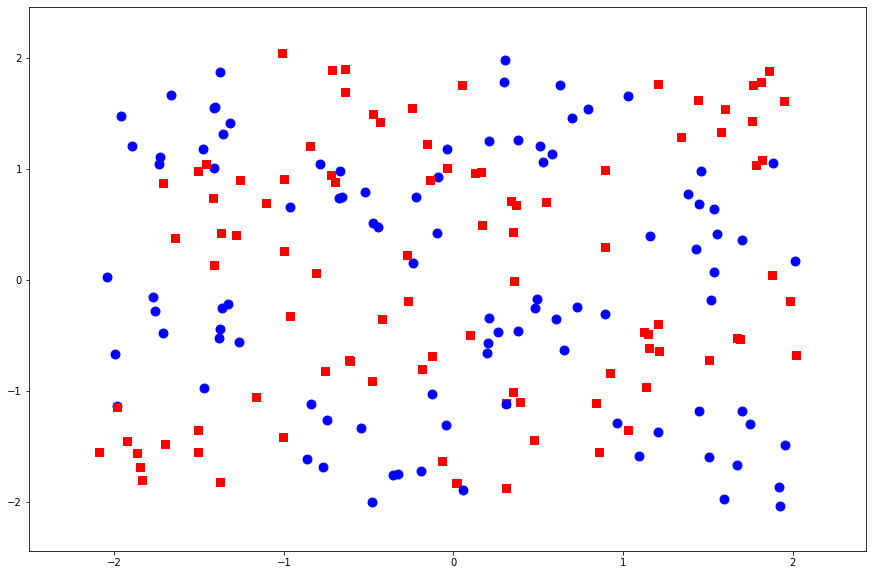

In [43]:
plot_2d(Xk1,Yk1)

# *Perceptron*
## Les classifieurs linéaires (affines)

*1) A quoi correspond la frontière de décision du perceptron en dimension $p = 2$ ?*       
**Réponse :** La frontière correspond à une **plan** en dimension $p=2$ car les x sont dans $\mathbb{R}^2$.       

*=> Trouvez (à la main) une bonne séparatrice sur les trois jeu de données simulées. Quand est-ce que $\hat{f}_w(x)$ est grand ? négatif ? positif ?*         
**Réponse :**


*=> Quelle est la signification géométrique de cette fonction ?*          
**Réponse :**

*=> À quoi correspond $w_0$ ?*              
**Réponse :**

*2) Vérifiez que la fonction `predict(x,w)` prend en entrée un vecteur $x ∈ \mathbb{R}^p$ et un vecteur poids $w ∈ \mathbb{R}^{p+1}$ et renvoie le vecteur de prédiction $\hat f_w(x)$. Vérifiez ensuite que `predict_class(x,w)` renvoie bien l’étiquette prédite $sign( \hat f_w(x))$.*         
**Réponse :** Voir le code ci-dessous.

In [44]:
###############################################################################
#               Loss functions and their gradient
###############################################################################

def predict(x, w):
    """Prediction from a normal vector."""
    return np.dot(x, w[1:]) + w[0]


def predict_class(x, w):
    """Predict a class from at point x thanks to a normal vector."""
    return np.sign(predict(x, w))


def zero_one_loss(x, y, w):
    """0-1 loss function."""
    return abs(y - np.sign(predict(x, w))) / 2.


def hinge_loss(x, y, w):
    """Hinge loss function."""
    return np.maximum(0., 1. - y * predict(x, w))


def mse_loss(x, y, w):
    """Mean square error loss."""
    return (y - predict(x, w)) ** 2


def norm2(x, y, w):
    """Squared norm of a vector."""
    return np.dot(w, w)


def gr_hinge_loss(x, y, w):
    """Sub-gradient of the loss function hingeloss."""
    return np.dot(-y * (hinge_loss(x, y, w) > 0.),
                  np.hstack((np.ones((x.shape[0], 1)), x)))


def gr_mse_loss(x, y, w):
    """Gradient of the least squares lost function."""
    return -2. * np.dot(y - predict(x, w),
                        np.hstack((np.ones((x.shape[0], 1)), x)))


def gr_norm2(x, y, w):
    """Gradient of the squared norm."""
    return 2. * w


def pen_loss_aux(x, y, w, l):
    """Loss function penalized by hinge loss."""
    return hinge_loss(x, y, w) + l * norm2(x, y, w)


def gr_pen_loss_aux(x, y, w, l):
    """Gradient of hinge loss penalized loss function."""
    return gr_hinge_loss(x, y, w) + l * gr_norm2(x, y, w, )


def pen_loss(l):
    """Penalized loss function."""
    return lambda x, y, w: pen_loss_aux(x, y, w, l)


def gr_pen_loss(l):
    """Gradient penalized loss function."""
    return lambda x, y, w: gr_pen_loss_aux(x, y, w, l)




## Fonction de coût
*3) Quelle est la nature des fonctions pour les trois pertes étudiées ?*              
**Réponses :**        
Pour le `ZeroOneLoss`, la fonction est de type constante par morceaux (1 bras de croix gammé).    
Pour le `MSELoss`, la fonction est de type quadratique.                 
Pour le `HingeLoss`, la fonction est de type linéaire par morceaux (une charnière, ou un angle).

# *Algorithme de descente de gradient stochastique*

*4) Décrire un pseudo algorithme “Perceptron version aléatoire”, une variante qui visite les observations en effectuant un tirage aléatoire uniforme (faire le cas avec remise et sans remise). On ne demande pas de re-coder cette fonction ici. C’est cette version qui est généralement appelée méthode de descente de gradient stochastique. Remarquez que c’est celle qui est proposée par défaut dans la fonction `gradient`.*

In [45]:
###############################################################################
#            Displaying tools for the Frontiere
###############################################################################


def frontiere(f, X, step=50, cmap_choice=cm.coolwarm):
    """Frontiere plotting for a decision function f."""
    min_tot0 = np.min(X[:, 0])
    max_tot0 = np.max(X[:, 0])
    min_tot1 = np.min(X[:, 1])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    plt.imshow(z, origin='lower', interpolation="nearest", cmap=cmap_choice,
               extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    plt.colorbar()


def frontiere_new(clf, X, y, w=None, step=50, alpha_choice=1, colorbar=True,
                  samples=True, n_labels=3, n_neighbors=3):
    """Trace la frontiere pour la fonction de decision de clf."""
    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    XX = np.c_[xx.ravel(), yy.ravel()]
    print(XX.shape)
    z = clf.predict(XX)
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', interpolation="mitchell", alpha=0.80,
               cmap=my_cmap, extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    if colorbar is True:
        ax = plt.gca()
        cbar = plt.colorbar(ticks=labels)
        cbar.ax.set_yticklabels(labels)

    # color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    # sns.set_palette(color_blind_list)
    ax = plt.gca()
    if samples is True:
        for i, label in enumerate(y):
            label_num = np.where(labels == label)[0][0]
            plt.scatter(X[i, 0], X[i, 1], c=color_blind_list[label_num],
                        s=80, marker=symlist[label_num])
    plt.xlim([min_tot0, max_tot0])
    plt.ylim([min_tot1, max_tot1])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)
    plt.title("L=" + str(n_labels) + ",k=" +
              str(n_neighbors))


def frontiere_3d(f, data, step=20):
    """Plot the 3d frontiere for the decision function f."""
    ax = plt.gca(projection='3d')
    xmin, xmax = data[:, 0].min() - 1., data[:, 0].max() + 1.
    ymin, ymax = data[:, 1].min() - 1., data[:, 1].max() + 1.
    xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin) * 1. / step),
                         np.arange(ymin, ymax, (ymax - ymin) * 1. / step))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    ax.plot_surface(xx, yy, z, rstride=1, cstride=1,
                    linewidth=0., antialiased=False,
                    cmap=plt.cm.coolwarm)


def plot_cout(X, y, loss_fun, w=None):
    """Plot the cost function encoded by loss_fun,

    Parameters
    ----------
    X : data features
    y :  labels
    loss_fun : loss function
    w : (optionnal) can be used to give a historic path of the weights """
    def _inter(wn):
        ww = np.zeros(3)
        ww[1:] = wn
        return loss_fun(X, y, ww).mean()
    datarange = np.array([[np.min(X[:, 0]), np.min(X[:, 1])],
                          [np.max(X[:, 0]), np.max(X[:, 1])]])
    frontiere(_inter, np.array(datarange))
    if w is not None:
        plt.plot(w[:, 1], w[:, 2], 'k')
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])


def plot_cout3d(x, y, loss_fun, w):
    """ trace le cout de la fonction cout loss_fun passee en parametre, en x,y,
        en faisant varier les coordonnees du poids w.
        W peut etre utilise pour passer un historique de poids"""
    def _inter(wn):
        ww = np.zeros(3)
        ww[1:] = wn
        return loss_fun(x, y, ww).mean()

    datarange = np.array([[w[:, 1].min(), w[:, 2].min()],
                         [w[:, 1].max(), w[:, 2].max()]])
    frontiere_3d(_inter, np.array(datarange))
    plt.plot(w[:, 1], w[:, 2], np.array([_inter(w[i, 1:]) for i in
             range(w.shape[0])]), 'k-', linewidth=3)

###############################################################################
#                Algorithms and functions
###############################################################################


def gradient(x, y, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=True):
    """ algorithme de descente du gradient:
        - x : donnees
        - y : label
        - eps : facteur multiplicatif de descente
        - niter : nombre d'iterations
        - w_ini
        - loss_fun : fonction de cout
        - gr_loss_fun : gradient de la fonction de cout
        - stoch : True : gradient stochastique
        """
    w = np.zeros((niter, w_ini.size))
    w[0] = w_ini
    loss = np.zeros(niter)
    loss[0] = loss_fun(x, y, w[0]).mean()
    for i in range(1, niter):
        if stochastic:  # this is for Stochastic Gradient Descent
            idx = [np.random.randint(x.shape[0])]
        else:           # this is for pure Gradient Descent
            idx = np.arange(x.shape[0])
        w[i, :] = w[i - 1, :] - eps * gr_loss_fun(x[idx, :],
                                                  y[idx], w[i - 1, :])
        loss[i] = loss_fun(x, y, w[i, :]).mean()
    return w, loss


def plot_gradient(X, y, wh, cost_hist, loss_fun):
    """ display 4 figures on how  (stochastic) gradient descent behaves
    wh : solution history
    cost_hist : cost history
    loss_fun : loss function
    """
    best = np.argmin(cost_hist)
    plt.subplot(221)
    plt.title('Data and hyperplane estimated')
    plot_2d(X, y, wh[best, :])
    plt.subplot(222)
    plt.title('Projection of level line and algorithm path')
    plot_cout(X, y, loss_fun, wh)
    plt.subplot(223)
    plt.title('Objective function vs iterations')
    plt.plot(range(cost_hist.shape[0]), cost_hist)
    plt.subplot(224, projection='3d')
    plt.title('Level line and algorithm path')
    plot_cout3d(X, y, loss_fun, wh)


###############################################################################
#                Polynomial transformations
###############################################################################


def poly2(x):
    """ creates features for second order interactions """
    if x.ndim == 1:
        x = x[None, :]
    nb, d = x.shape
    res = x
    for i in range(0, d):
        for j in range(i, d):
            res = np.hstack((res, x[:, i:i + 1] * x[:, j:j + 1]))
    return res


def poly3(x):
    """ creates features for third order interactions """
    if x.ndim == 1:
            x = x[None, :]
    nb, d = x.shape
    res = poly2(x)
    for i in range(0, d):
        for j in range(i, d):
            for k in range(j, d):
                res = np.hstack(
                    (res, x[:, i:i + 1] * x[:, j:j + 1] * x[:, k:k + 1]))
    return res

*5) On va observer graphiquement avec `plot_gradient` l’évolution de (**voir énoncé**). Lancer l’exemple avec et sans l’option stochastique. Pourquoi le nombre d’itérations est `niter *len(y1)` pour le cas stochastique ?*

In [46]:
""" algorithme de descente du gradient:
        - x : donnees
        - y : label
        - eps : facteur multiplicatif de descente
        - niter : nombre d'iterations
        - w_ini
        - loss_fun : fonction de cout
        - gr_loss_fun : gradient de la fonction de cout
        - stoch : True : gradient stochastique
        """
eps = 1e-2
niter = 1000
w_ini = np.array([1,1,0])
loss_fun = hinge_loss
gr_loss_fun = gr_hinge_loss

whb, cost_histb = gradient(Xb1, Yb1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=True)

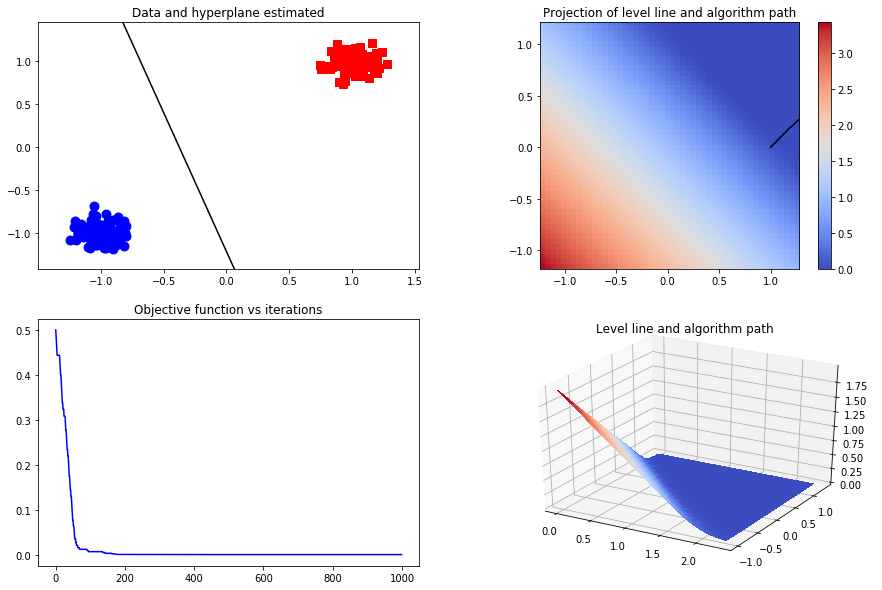

In [30]:
plot_gradient(Xb1, Yb1, whb, cost_histb, loss_fun)

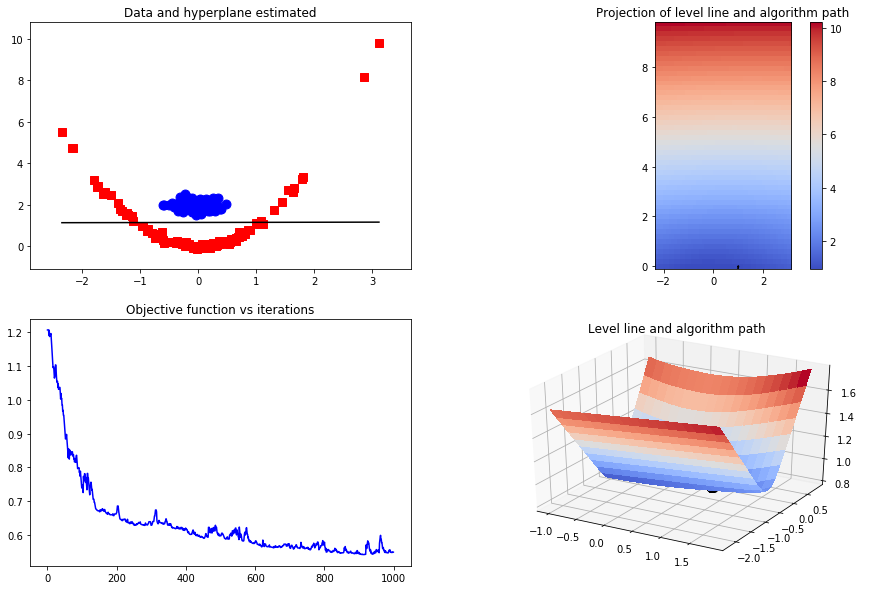

In [47]:
whc, cost_histc = gradient(Xc1, Yc1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=True)
plot_gradient(Xc1, Yc1, whc, cost_histc, loss_fun)

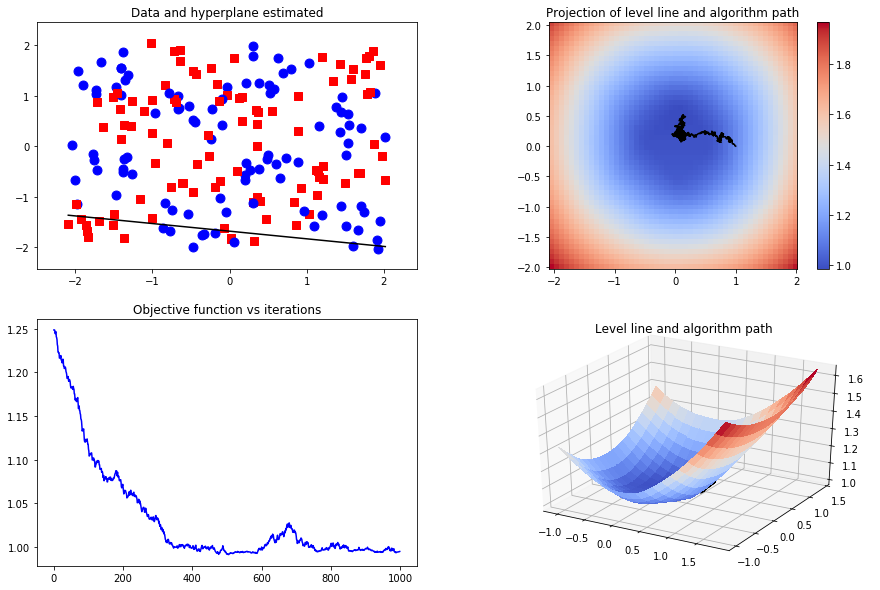

In [48]:
whk, cost_histk = gradient(Xk1, Yk1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=True)
plot_gradient(Xk1, Yk1, whk, cost_histk, loss_fun)

#### En mode **non stochastique** :

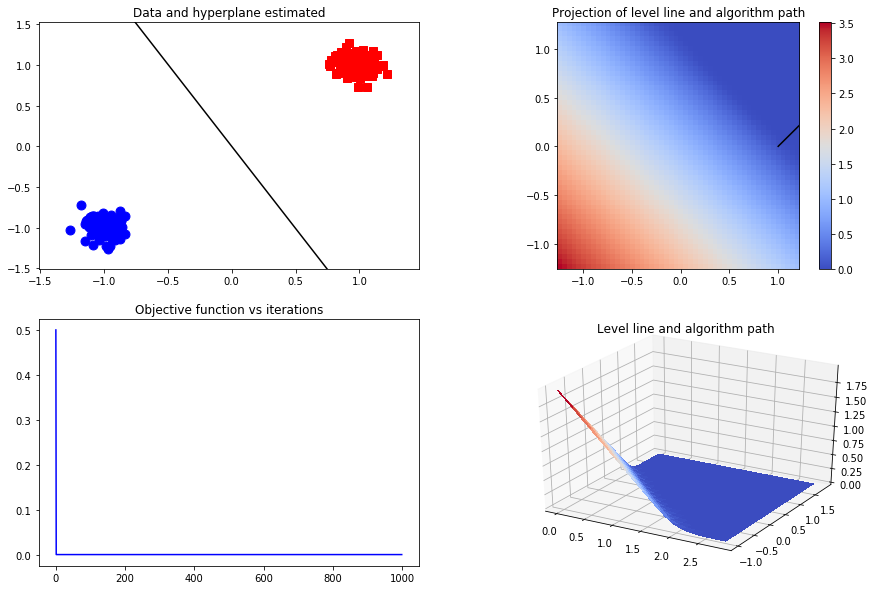

In [49]:
whn, cost_histn = gradient(Xb1, Yb1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=False)
plot_gradient(Xb1, Yb1, whn, cost_histn, loss_fun)

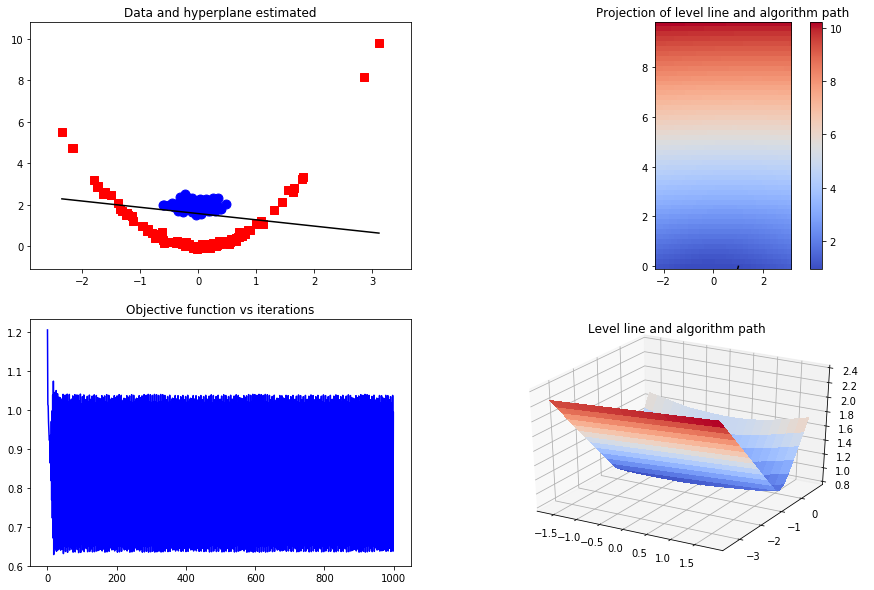

In [50]:
whcn, cost_histcn = gradient(Xc1, Yc1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=False)
plot_gradient(Xc1, Yc1, whcn, cost_histcn, loss_fun)

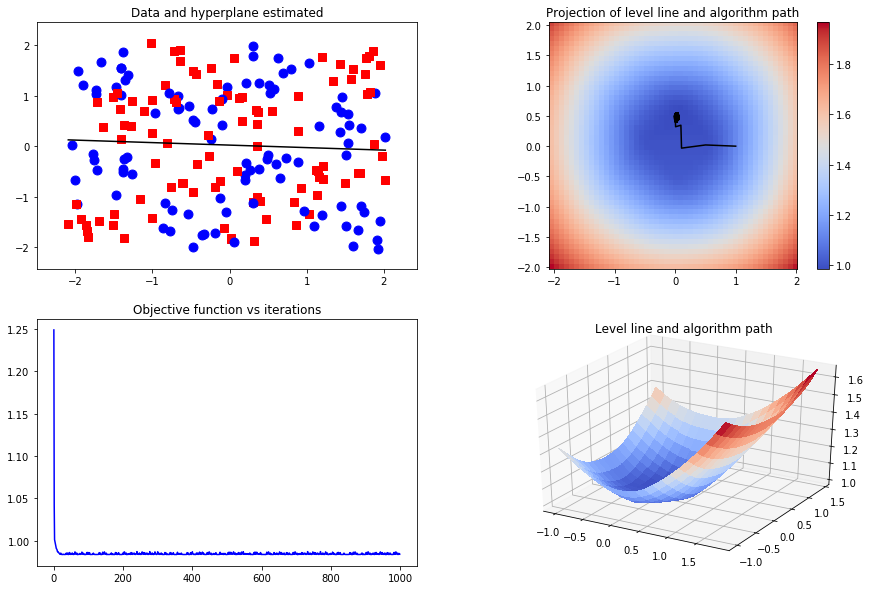

In [51]:
whkn, cost_histkn = gradient(Xk1, Yk1, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=False)
plot_gradient(Xk1, Yk1, whkn, cost_histkn, loss_fun)